<img src = "https://drive.google.com/uc?export=view&id=1cnVkf5kAyaf7jWnmCmUfZwUlvh3GOn4S" alt = "Encabezado MLDS unidad 0" width = "100%">  </img>

# Taller 4: Dask
---

En este taller se evaluarán las habilidades adquiridas con la librería `dask` en _Python_. En este caso veremos cómo entrenar un modelo de clasificación binaria sobre el conjunto de datos de dígitos [UCI ML hand-written digits datasets](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

Este conjunto de datos contiene imágenes de tamaño `(8, 8)` en escala de grises y una etiqueta correspodiente al dígito (entre el 0 y el 9) al que corresponde la imagen.

> **Nota:** Esta tarea va a ser calificada en la plataforma **[UNCode](https://juezun.github.io/)**. Para esto, en cada ejercicio se indicará si es calificable o no, también los lugares donde debe escribir su código sin modificar lo demás con un aproximado de cantidad de líneas a escribir. No se preocupe si su código toma más líneas, esto es simplemente un aproximado destinado a que pueda replantear su estrategia si el código está tomando más de las esperadas. No es un requisito estricto y soluciones más largas también son válidas. Al finalizar, para realizar el envío (*submission*), descargue el notebook como un archivo **`.ipynb`** y haga su entrega a través de **Edunext**.

Comenzaremos instalando las librerías necesarias:

In [1]:
#TEST_CELL
!pip install dask[complete] dask-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 12.4 MB/s eta 0:00:00


Ahora, importamos las librerías necesarias:

In [2]:
#TEST_CELL
import matplotlib.pyplot as plt
import dask.array as da
import dask.dataframe as dd
from IPython.display import display

## **Carga de Datos**
---

En este caso, descargaremos el conjunto de datos el cual viene en formato `zip` para obtener un archivo en formato `parquet` particionado:

In [3]:
#TEST_CELL
!wget 'https://raw.githubusercontent.com/mindlab-unal/mlds3-datasets/main/u4/digits.zip' -O 'digits.zip'
![[ -d 'digits.parquet' ]] && rm -rf 'digits.parquet'
!unzip 'digits.zip'

--2023-12-10 17:40:02--  https://raw.githubusercontent.com/mindlab-unal/mlds3-datasets/main/u4/digits.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166464 (163K) [application/zip]
Saving to: ‘digits.zip’

digits.zip          100%[===================>] 162.56K  --.-KB/s    in 0.02s   

2023-12-10 17:40:03 (7.15 MB/s) - ‘digits.zip’ saved [166464/166464]

Archive:  digits.zip
   creating: digits.parquet/
  inflating: digits.parquet/part.14.parquet  
  inflating: digits.parquet/part.9.parquet  
  inflating: digits.parquet/part.16.parquet  
  inflating: digits.parquet/part.1.parquet  
  inflating: digits.parquet/part.0.parquet  
  inflating: digits.parquet/part.3.parquet  
  inflating: digits.parquet/part.10.parquet  
  inflating: digits.parquet/part.2.par

Podemos corroborar que el archivo se encuentra particionado en varias partes:

In [4]:
#TEST_CELL
!ls digits.parquet

part.0.parquet	 part.12.parquet  part.15.parquet  part.2.parquet  part.5.parquet  part.8.parquet
part.10.parquet  part.13.parquet  part.16.parquet  part.3.parquet  part.6.parquet  part.9.parquet
part.11.parquet  part.14.parquet  part.1.parquet   part.4.parquet  part.7.parquet


Cargamos el conjunto de datos:

In [5]:
#TEST_CELL
data = dd.read_parquet("digits.parquet")
print(data.dtypes)

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
              ...   
pixel_7_4    float64
pixel_7_5    float64
pixel_7_6    float64
pixel_7_7    float64
label          int64
Length: 65, dtype: object


Como puede ver, el conjunto de datos contiene distintas columnas, entre ellas:

- `pixel_i_j`: corresponde al pixel (nivel de intensidad) de la imagen en la fila `i` y columna `j`.
- `label`: etiqueta del conjunto de datos con el número al que corresponde la imagen.

## **1. Selección del Conjunto de Datos**
---

En esta tarea usted deberá extraer un subconjunto de datos que contenga únicamente algunas categorías dentro de las etiquetas `labels`, para ello, deberá implementar la función `filter_data`, la cual debe retornar un `DataFrame` de `dask` con los resultados filtrados.

**Parámetros**

- `df`: se trata de un `DataFrame` de `dask` con el conjunto de datos.
- `labels`: lista de números con los digitos que se seleccionarán, por ejemplo, `[1, 2, 4]`.

**Retorna**

- `valid_data`: se trata de un `DataFrame` de `dask` con los datos filtrados:

In [6]:
def filter_data(df, labels):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    valid_data = df.query(f'label == {labels}')
    ### FIN DEL CÓDIGO ###
    return valid_data

Use la siguiente celda para probar su código al extraer los dígitos `[0, 1]`:

In [7]:
#TEST_CELL
try:
    filtered_data = filter_data(data, [0, 1])
    print(filtered_data.shape[0].compute())
except Exception as e:
    print(e)

360


**Salida esperada**:

`360`

Use la siguiente celda para probar su código al extraer los dígitos `[1, 3, 6]`:

In [8]:
#TEST_CELL
try:
    filtered_data = filter_data(data, [1, 3, 6])
    print(filtered_data.shape[0].compute())
except Exception as e:
    print(e)

546


**Salida esperada**:

`546`

<details>
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

Recuerde que puede usar el método `query` para seleccionar los registros que cumplen una condición.
</details>

<details>
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

Si desea usar el parámetro `labels` dentro de el método `query`, puede usar los f-strings de _Python_ o referenciarlo dentro del string del query de la siguiente forma `@labels`.
</details>

<details>
<summary>
    <font size="3" color="darkgreen"><b>Pista 3</b></font>
</summary>

Recuerde que el resultado debe ser un `DataFrame` de `dask`, es decir, debe evitar usar el método `compute` para no retornar los resultados dentro de `pandas`.
</details>

## **2. Características y Etiqueta**
---

En este punto deberá retornar dos arreglos de `dask` correspondientes a la matriz de observaciones $\mathbf{X}$ y las etiquetas $y$.

> **Nota**: se recomienda usar el método `to_dask_array(lenghts=True)` de los `DataFrames` de `dask` para convertirlos a arreglos (es necesario que use `lenghts=True` para que los tamaños se evalúen).

**Parámetros**

- `df`: se trata de un `DataFrame` de `dask` con el conjunto de datos.

**Retorna**

- `X`: matriz de observaciones.
- `y`: etiquetas.

In [9]:
def get_x_y(df):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    X = df.drop('label', axis=1).to_dask_array(lengths=True)
    y = df['label'].to_dask_array(lengths=True)
    ### FIN DEL CÓDIGO ###
    return X, y

Use la siguiente celda para probar su código:

In [10]:
#TEST_CELL
try:
    filtered_data = filter_data(data, [0, 1])
    X, y = get_x_y(filtered_data)
    display(X[:2].compute())
    display(y[:2].compute())
except Exception as e:
    print(e)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

array([0, 1])

**Salida esperada**:

```python
array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])
array([0, 1])
```

Use la siguiente celda para visualizar las primeras 9 imágenes del conjunto de datos:

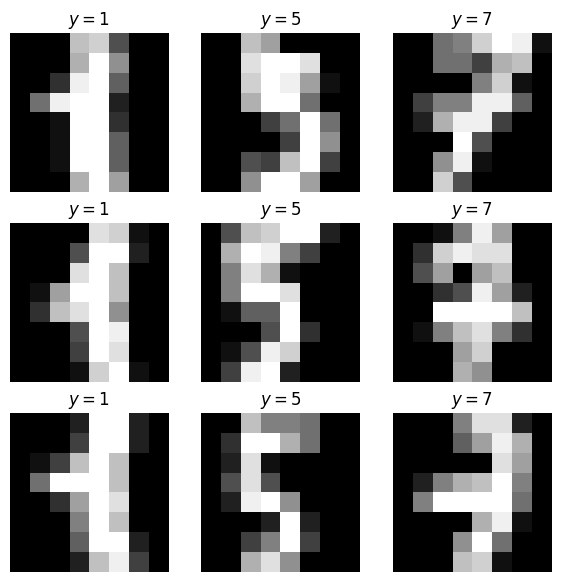

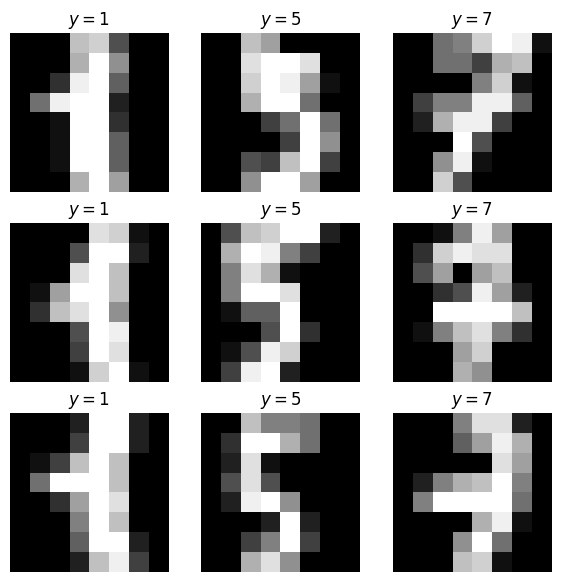

In [11]:
#TEST_CELL
try:
    filtered_data = filter_data(data, [1, 5, 7])
    X, y = get_x_y(filtered_data)
    imgs = X[:9].compute()
    labs = y[:9].compute()
    cont = 0
    fig, axes = plt.subplots(3, 3, figsize=(7, 7))
    for i in range(3):
        for j in range(3):
            ax = axes[i, j]
            ax.imshow(imgs[cont].reshape(8, 8), cmap="gray")
            ax.axis("off")
            ax.set_title(f"$y={labs[cont]}$")
            cont += 1
    display(fig)
except Exception as e:
    print(e)

**Salida esperada**:

En este caso, debe obtener una figura con los dígitos del conjunto de datos, el resultado puede variar un poco debido a que los datos están distribuidos, no obstante, puede validar que el resultado contenga únicamente los dígitos `[1, 5, 7]`.

<img src="https://drive.google.com/uc?export=view&id=13giOSILbbS4wdiLu1LxEsCKW8A36Lmgq" width="50%" alt="numeros ejemplo">

<details>
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

Recuerde que con el método `drop` puede excluir columnas del conjunto de datos, esto le puede ser de utilidad para obtener la etiqueta.
</details>

<details>
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

Recuerde usar el método `to_dask_array` para obtener arreglos de `dask` a partir de el `DataFrame`.
</details>

## **3. Validación Cruzada**
---

En este punto deberá extraer las particiones de entrenamiento y prueba a partir del conjunto de datos como arreglos de `dask`. Para esto, deberá implementar la función `get_splits`.

**Parámetros**

- `X`: arreglo de `dask` con las características.
- `y`: arreglo de `dask` con las etiquetas.

**Retorna**

- `X_train`: arreglo de `dask` con las características de entrenamento.
- `X_test`: arreglo de `dask` con las características de prueba.
- `y_train`: arreglo de `dask` con las etiquetas de entrenamiento.
- `y_test`: arreglo de `dask` con las etiquetas de prueba.

In [12]:
from dask_ml.model_selection import train_test_split

def get_splits(X, y, test_size, random_state):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
        )

    return X_train, X_test, y_train, y_test

Use la siguiente celda para probar su código:

In [13]:
#TEST_CELL
try:
    filtered_data = filter_data(data, [2, 3])
    X, y = get_x_y(filtered_data)
    X_train, X_test, y_train, y_test = get_splits(X, y, 0.3, 42)
    print(X_train.shape[0])
    print(X_test.shape[0])
except Exception as e:
    print(e)

246
114


**Salida esperada**:

```python
246
114
```

Use la siguiente celda para probar su código:

In [14]:
#TEST_CELL
try:
    filtered_data = filter_data(data, [2, 3])
    X, y = get_x_y(filtered_data)
    X_train, X_test, y_train, y_test = get_splits(X, y, 0.4, 42)
    print(X_train.shape[0])
    print(X_test.shape[0])
except Exception as e:
    print(e)

211
149


**Salida esperada**:

```python
211
149
```

<details>
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

Recuerde usar la función `train_test_split` que funciona de la misma forma como funciona su equivalente en `sklearn`.
</details>

<details>
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

No olvide el parámetro `random_state` que corresponde a la semilla de números aleatorios, esto es especialmente importante para que el resultado siempre sea el mismo.
</details>

## **4. Preprocesamiento**
---

En este punto deberá implementar la función `preprocess_data` la cual debe realizar las siguientes operaciones para retornar las matrices de características preprocesadas:

- Aplicar un preprocesamineto de tipo `MinMaxScaler` sobre los pixeles de todas las imágenes tanto de entrenamiento y prueba.
- Validar las columnas de la matriz de entrenamiento y prueba donde todos los valores son iguales a cero y eliminarlas (Nota: esto lo hacemos solamente por motivos pedagógicos).

**Parámetros**

- `X_train`: características del conjunto de entrenamiento.
- `X_test`: características del conjunto de prueba.

**Retorna**

- `X_train_t`: características de entrenamiento luego del preprocesamiento.
- `X_test_t`: características de prueba luego del preprocesamiento.

In [15]:
from dask_ml.preprocessing import MinMaxScaler

def preprocess_data(X_train, X_test):
    ### ESCRIBA SU CÓDIGO AQUÍ ###

    norm = MinMaxScaler().fit(X_train)

    X_train_t = norm.transform(X_train)
    X_train_2 = X_train_t[:,(X_train_t.sum(axis=0) != 0).compute()]

    X_test_t = norm.transform(X_test)
    X_test_2 = X_test_t[:,(X_train_t.sum(axis=0) != 0).compute()]

    ### FIN DEL CÓDIGO ###
    return X_train_2, X_test_2

Use la siguiente celda para probar su código:

In [16]:
#TEST_CELL
try:
    filtered_data = filter_data(data, [4, 5])
    X, y = get_x_y(filtered_data)
    X_train, X_test, y_train, y_test = get_splits(X, y, 0.4, 42)
    X_train_t, X_test_t = preprocess_data(X_train, X_test)
    print(X_train_t.shape[1])
    print(X_test_t.shape[1])
except Exception as e:
    print(e)

56
56


**Salida esperada**:

```python
56
56
```

Use la siguiente celda para probar su código:

In [17]:
#TEST_CELL
try:
    filtered_data = filter_data(data, [0, 1])
    X, y = get_x_y(filtered_data)
    X_train, X_test, y_train, y_test = get_splits(X, y, 0.4, 42)
    X_train_t, X_test_t = preprocess_data(X_train, X_test)
    print(X_train_t.min().compute())
    print(X_train_t.max().compute())
except Exception as e:
    print(e)

0.0
1.0


**Salida esperada**:

```python
0.0
1.0
```

Use la siguiente celda para probar su código:

In [18]:
#TEST_CELL
try:
    filtered_data = filter_data(data, [0, 1])
    X, y = get_x_y(filtered_data)
    X_train, X_test, y_train, y_test = get_splits(X, y, 0.4, 42)
    X_train_t, X_test_t = preprocess_data(X_train, X_test)
    print(X_test_t.min().compute())
    print(X_test_t.max().compute())
except Exception as e:
    print(e)

-0.15384615384615385
1.4000000000000001


**Salida esperada**:

```python
-0.15384615384615385
1.4000000000000001
```

<details>
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

Recuerde que la clase `MinMaxScaler` de `dask_ml` funciona igual que en `sklearn`, es decir, debe usar métodos como `fit` y `transform`.
</details>

<details>
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

Puede obtener un arreglo con las columnas que son todas iguales a cero de la siguiente forma:

```python
X.sum(axis=0) != 0
```
</details>

## **5. Entrenamiento**
---

En este punto deberá entrenar un modelo de regresión logística a partir de los datos de entrenamiento, para ello debe implementar la función `get_model`.

**Parámetros**

- `X_train`: matriz de características de los datos de entrenamiento.
- `y_train`: vector de etiquetas de los datos de entrenamiento.

**Retorna**

- `model`: modelo de regresión logística de `dask_ml` entrenado.

In [19]:
from dask_ml.linear_model import LogisticRegression

def get_model(X_train, y_train):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    model = LogisticRegression().fit(X_train, y_train)
    ### FIN DEL CÓDIGO ###
    return model

Use la siguiente celda para probar su código:

In [20]:
#TEST_CELL
try:
    filtered_data = filter_data(data, [0, 1])
    X, y = get_x_y(filtered_data)
    X_train, X_test, y_train, y_test = get_splits(X, y, 0.4, 42)
    X_train_t, X_test_t = preprocess_data(X_train, X_test)
    model = get_model(X_train_t, y_train)
    display(model.coef_)
    display(model.intercept_)
except Exception as e:
    print(e)

array([-0.05338432,  0.22464701, -0.95120178, -0.33244229,  1.27501462,
        1.61876774, -0.93399056, -0.72862928, -0.37096215,  0.62003108,
       -0.20548536,  0.36816541, -0.20556069, -0.50317026,  1.00967523,
        1.30625582, -0.5749552 , -0.6905073 , -0.36081751, -0.3812224 ,
        0.78846883,  1.20836649, -0.40910911, -1.46935234, -0.92608839,
       -0.80992355,  0.87684418,  1.15444242, -0.61929508, -1.53742897,
       -0.81395831, -0.87704255,  0.65162104,  1.02974852, -0.92898472,
       -1.36614312, -0.52658602, -0.70198772, -0.36575253, -0.13802359,
       -0.80049495,  0.21175508,  0.72612884,  0.12477463, -0.94169424,
       -0.71424477,  0.50165742,  0.78374199,  0.52139425])

3.553751632049826

**Salida esperada**

```python
array([-0.05338432,  0.22464701, -0.95120178, -0.33244229,  1.27501462,
        1.61876774, -0.93399056, -0.72862928, -0.37096215,  0.62003108,
       -0.20548536,  0.36816541, -0.20556069, -0.50317026,  1.00967523,
        1.30625582, -0.5749552 , -0.6905073 , -0.36081751, -0.3812224 ,
        0.78846883,  1.20836649, -0.40910911, -1.46935234, -0.92608839,
       -0.80992355,  0.87684418,  1.15444242, -0.61929508, -1.53742897,
       -0.81395831, -0.87704255,  0.65162104,  1.02974852, -0.92898472,
       -1.36614312, -0.52658602, -0.70198772, -0.36575253, -0.13802359,
       -0.80049495,  0.21175508,  0.72612884,  0.12477463, -0.94169424,
       -0.71424477,  0.50165742,  0.78374199,  0.52139425])
3.553751632049826
```

<details>
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

Recuerde que `dask_ml` funciona de una forma muy equivalente a `sklearn`, con la diferencia de que esta librería opera directamente sobre arreglos de `dask`.
</details>

## **6. Evaluación**
---

En este punto deberá implementar la función `evaluate_model` la cual debe usar un modelo previamente entrenado y evaluar el accuracy (desde `dask`) usando los datos de prueba.

**Parámetros**

- `model`: modelo de `dask_ml` previamente entrenado.
- `X_test`: matriz de características del conjunto de prueba.
- `y_test`: vector de características del conjunto de evaluación.

**Retorna**

- `acc`: valor de accuracy obtenido al evaluar el modelo.

In [21]:
from dask_ml.metrics import accuracy_score

def evaluate_model(model, X_test, y_test):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    ### FIN DEL CÓDIGO ###
    return acc

Use la siguiente celda para probar su código:

In [22]:
#TEST_CELL
try:
    filtered_data = filter_data(data, [0, 1])
    X, y = get_x_y(filtered_data)
    X_train, X_test, y_train, y_test = get_splits(X, y, 0.4, 42)
    X_train_t, X_test_t = preprocess_data(X_train, X_test)
    model = get_model(X_train_t, y_train)
    acc = evaluate_model(model, X_test_t, y_test)
    print(acc)
except Exception as e:
    print(e)

1.0


**Salida esperada**:

```python
1.0
```

<details>
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

Puede evaluar el accuracy de un modelo en `dask_ml` usando la función `accuracy_score`.
</details>

<details>
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

Recuerde que debe calcular las predicciones sobre el conjunto de prueba usando el método `predict` de un modelo de `dask_ml`.
</details>

## **Créditos**
---

**Profesor**

- [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/)

**Diseño, desarrollo del notebook y material audiovisual**

- [Juan S. Lara MSc](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/)

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*